# Analiza eksploracyjna danych

## Wstęp

Zanim zajmiemy się rozwiązywaniem faktycznego problemu ML-owego, wskazane jest lepsze zrozumienie zbioru danych, który zostanie wykorzystany. Etap ten jest określany analizą eksploracyjną danych (ang. exploratory data analysis, EDA). Jego celem jest odpowiedź na pytanie jakie dane mają charakter kategoryczny, jakie numeryczny, jak wyglądają ich liczności, podstawowe statystyki, rozkłady a także korelacje. Ponadto, warto zwrócić uwagę na brakujące wartości i wartości odstające.

Warto pamiętać, że EDA powinno być realizowane w odniesieniu do problemu do rozwiązania, gdyż pozwala ukierunkować nas w kierunku lepszego zrozumienia tych aspektów danych, które wykorzystamy finalnie do rozwiązania problemu. Naturalnie, nic nie stoi na przeszkodzie, aby EDA realizować bez tego celu, jednak wtedy prawdopodobnie efektem EDA byłoby opracowanie ogromnej liczby statystyk i wykresów bez większego ich zrozumienia.

Do realizacji EDA dobrze najadą się narzędzia takie jak jupyter, ponieważ pozwalają na bieżąco obserwujemy wynik poleceń a także łatwo możemy wrócić do poprzednich analiz. Warto jednak pamiętać, żeby przed zamknięciem etapu EDA ponownie sobie uruchomić cały notatnik, aby upewnić się, że po drodze nic roboczo nie zostało zmienione. W wielu przypadkach analitycy wyciągają z własnych (szerszych) notebooków EDA wybrane wykresy i analizy do prezentacji i rozmów.

W ramach tego tutoriala nauczymy się wykonywać podstawowe kroki związane z EDA.

## Narzędzia
Niniejszy tutorial zrealizowany jest w języku R. Przed przystąpieniem do instalacji pakietu należy zainstalować [R](https://cran.r-project.org) i [RStudio](https://www.rstudio.com). W kolejnym kroku instalujemy kilka przydatnych pakietów, takich jak `tidyverse` do analizy danych, `ggplot2` do wykresów i `dplyr` do wygodnej manipulacji danymi, a także `corrplot` do wykresów korelacji.

In [1]:
if (!require('tidyverse')) install.packages('tidyverse')

Loading required package: tidyverse

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 1.0.0 
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks

In [2]:
if (!require('ggplot2')) install.packages('ggplot2')

In [3]:
if (!require('dplyr')) install.packages('dplyr')

In [4]:
if (!require('corrplot')) install.packages('corrplot')

Loading required package: corrplot

corrplot 0.92 loaded



## Wstępna analiza danych
W tutorialu wykorzystamy wbudowany w R zbiór `diamonds`.

In [5]:
data(diamonds)

Pierwszym krokiem analizy powinno być zorientowanie się jakie mamy kolumny w zbiorze.

In [6]:
colnames(diamonds)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

W kolejnym kroku można zerknąć na kilka wierszy zbioru danych, służy do tego polecenie `head`.

In [7]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


Ten krok pozwala odpowiedzieć na pytanie jakie dane są numeryczne, jakie kategoryczne. Bardzo pomocną funkcją, która wykona też podstawowe analizy zbioru danych w zakresie statystyk, jest `summary`.

In [8]:
summary(diamonds)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

Funkcja ta dla danych numerycznych prezentuje wartości minimalne i maksymalne, średnią i medianę a także kwantyle. Dane kategoryczne opisane są zaś licznością dla każdej z kategorii.

# Rozkłady

Język R oferuje funkcję `hist`, która przestawia dane w postaci histogramu. Przyjrzyjmy się histogramowi cechy `price`.

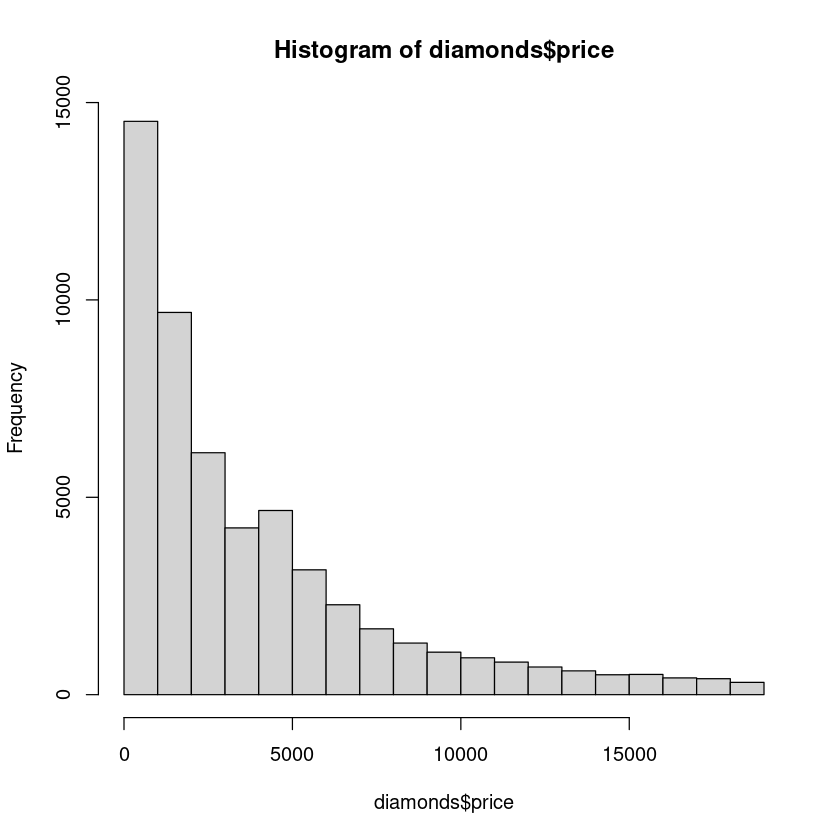

In [9]:
hist(diamonds$price)

Histogram też można wyrysować dla zadanej liczby kubełków używając parametru `breaks`:

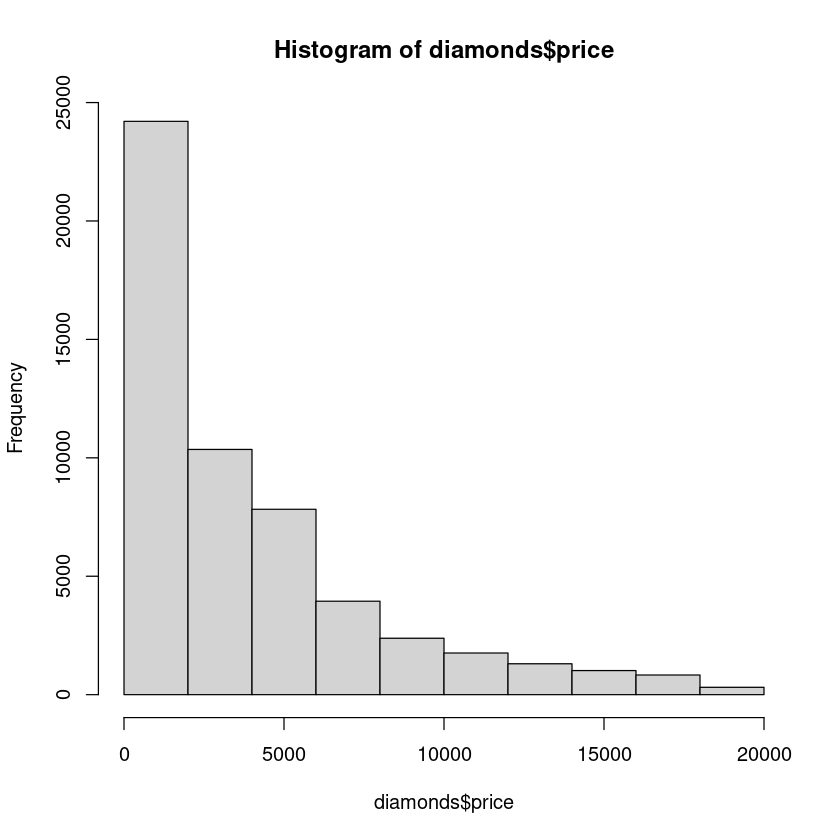

In [10]:
hist(diamonds$price, breaks = 8)

Natomiast jeśli dane mają duży rozrzut wartości, warto przedstawić je na wykresie logarytmicznym - tu posłużymy się biblioteką `ggplot2`:

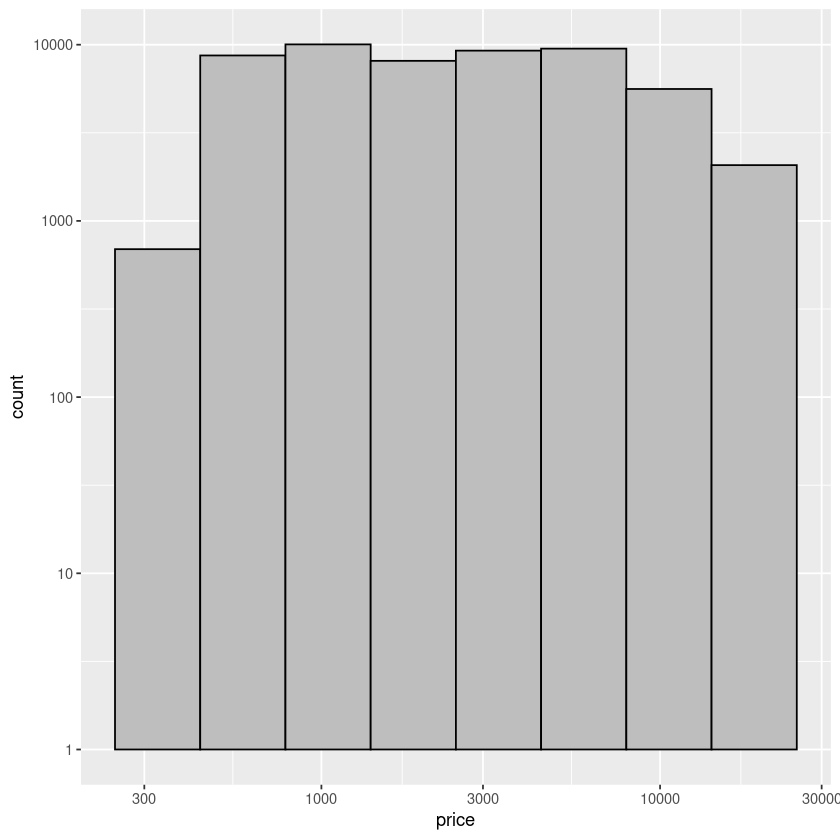

In [11]:
ggplot(diamonds, aes(x=price)) + geom_histogram(color="black", fill="gray", bins=8) + scale_x_log10() + scale_y_log10()

# Analiza wielowymiarowa
W kolejnym kroku zapoznamy się z podstawami analizy wielowymiarowej. Możemy przykładowo spojrzeć na dane numeryczne przez pryzmat cechy kategorycznej, jak przedstawiono poniżej:

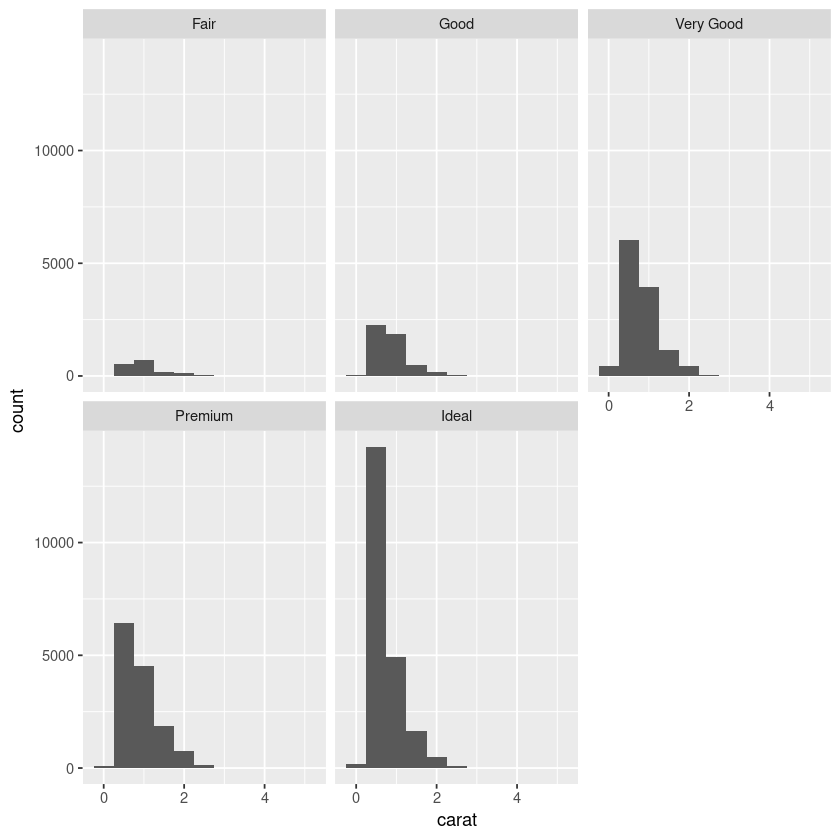

In [12]:
ggplot(data = diamonds) + geom_histogram(mapping = aes(x = carat), binwidth = 0.5) + facet_wrap(~cut)

Podobnie można spojrzeć na dane, ale przedstawiając je jako wykresy pudełkowe:

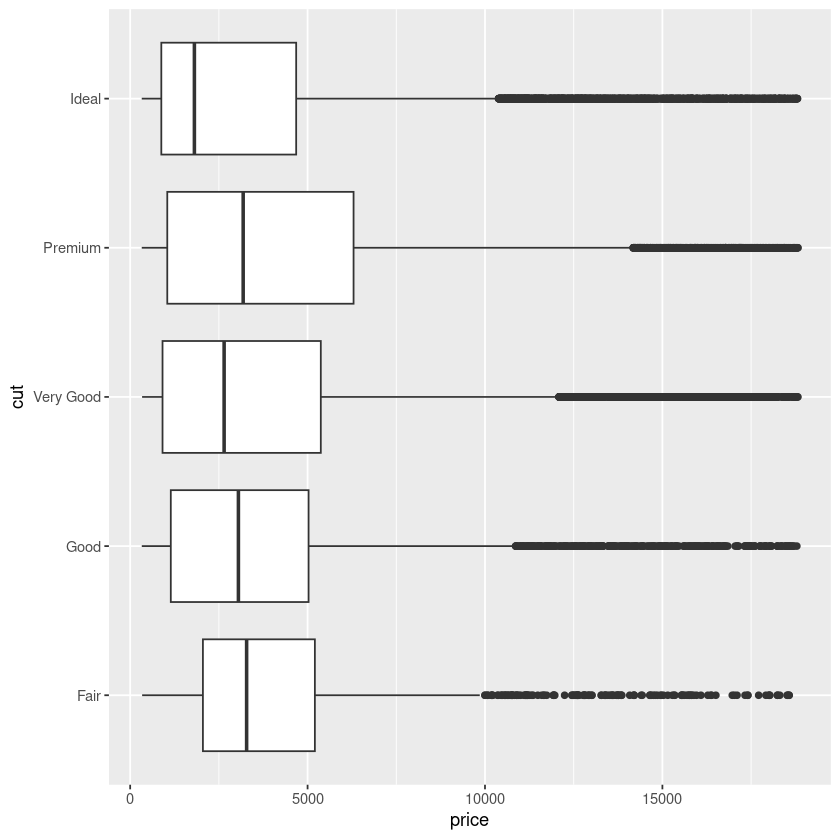

In [13]:
ggplot(diamonds, aes(y = cut, x = price)) + geom_boxplot()

Spróbujmy przyjrzeć się danym kategorycznym na dwóch wymiarach:

In [14]:
table(diamonds$cut, diamonds$color)

           
               D    E    F    G    H    I    J
  Fair       163  224  312  314  303  175  119
  Good       662  933  909  871  702  522  307
  Very Good 1513 2400 2164 2299 1824 1204  678
  Premium   1603 2337 2331 2924 2360 1428  808
  Ideal     2834 3903 3826 4884 3115 2093  896

W ten sposób szybko możemy zorientować się jak wygląda liczność na przecięciu dwóch kategorii.

Warto także przypomnieć wykres stem and leaf:

In [15]:
stem(diamonds[1:200,]$depth)


  The decimal point is at the |

  55 | 1
  56 | 9
  57 | 589
  58 | 01248
  59 | 222334445678889999
  60 | 0001222344455777777778899999999
  61 | 000001112222333344444555555566666666777777788888889999999
  62 | 000011111222222333334444445555566666777777888899999
  63 | 0001122333334467788888
  64 | 001456
  65 | 1237
  66 | 3



# Kowariancje i korelacje

Istotnym spojrzeniem na dane jest analiza kowariancji i korelacji.

Zacznijmy od analizy kowariancji. Spróbujmy odpowiedzieć na pytanie jak zmienia się cena w zależności od liczby karatów. Mając na uwadze dużą liczność zbioru, agregujemy pojedyncze punkty danych do wykresów pudełkowych.

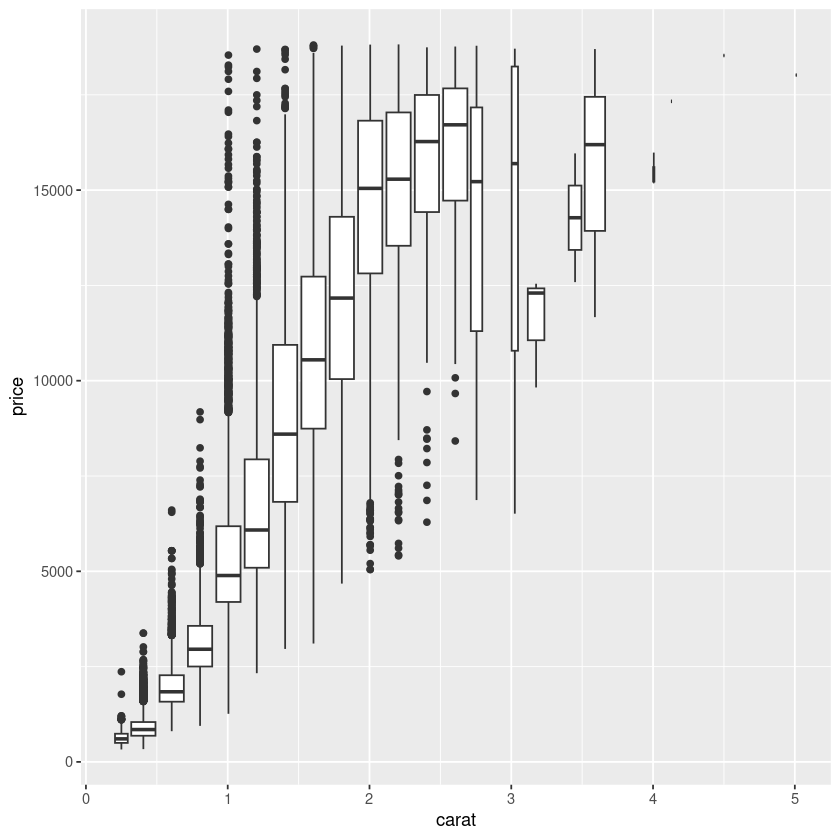

In [16]:
ggplot(data = diamonds, mapping = aes(x = carat, y = price)) + geom_boxplot(mapping = aes(group = cut_width(carat, 0.2)))

Chcąc zbadać korelacje, możemy sięgnąć do innej przydatnej biblioteki, `corrplot`, która w elegancki sposób prezentuje korelacje:

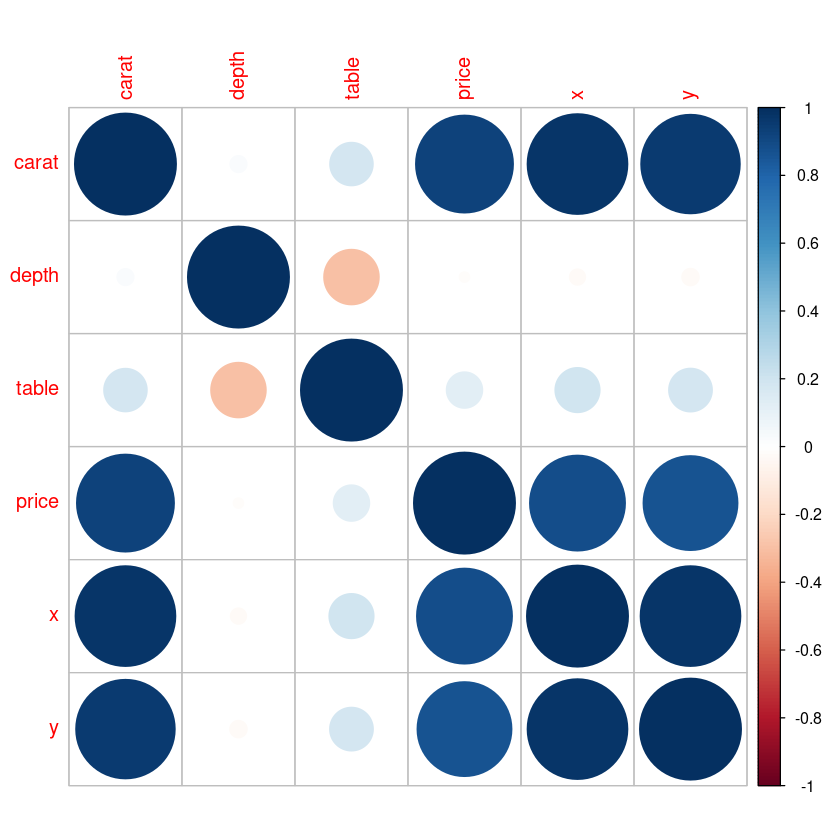

In [17]:
corrplot(cor(diamonds[,c(1, 5,6,7,8,9)]), method = "circle")

Naturalnie, najsilniej skorelowane są wartości same ze sobą, ale widzimy też, że istnieje silna zależność ceny od liczby karatów.

Natualnie, przedstawione powyżej metody są bazowymi metodami eksploracyjnej analizy danych. Ale znając konkretny cel badania i podstawowy wachlarz metod, można rozpocząć dalszą eksplorację ukierunkowaną na ten cel.

# Polecane materiały

Świetna książka, która pozwala wykorzystać potencjał języka R do analizy danych, to Wickham, H., & Grolemund, G. (2023). R for data science: import, tidy, transform, visualize, and model data. " O'Reilly Media, Inc.". https://r4ds.hadley.nz/.